# ਕੋਵਿਡ-19 ਪੇਪਰਾਂ ਦਾ ਵਿਸ਼ਲੇਸ਼ਣ

ਇਸ ਚੁਣੌਤੀ ਵਿੱਚ, ਅਸੀਂ ਕੋਵਿਡ ਮਹਾਮਾਰੀ ਦੇ ਵਿਸ਼ੇ ਨੂੰ ਜਾਰੀ ਰੱਖਾਂਗੇ ਅਤੇ ਇਸ ਵਿਸ਼ੇ 'ਤੇ ਵਿਗਿਆਨਕ ਪੇਪਰਾਂ ਨੂੰ ਪ੍ਰਕਿਰਿਆ ਕਰਨ 'ਤੇ ਧਿਆਨ ਦੇਵਾਂਗੇ। [CORD-19 ਡੇਟਾਸੈੱਟ](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge) ਵਿੱਚ 7000 ਤੋਂ ਵੱਧ (ਇਸ ਲਿਖਤ ਦੇ ਸਮੇਂ) ਕੋਵਿਡ 'ਤੇ ਪੇਪਰਾਂ ਮੌਜੂਦ ਹਨ, ਜਿਨ੍ਹਾਂ ਦੇ ਨਾਲ ਮੈਟਾ ਡੇਟਾ ਅਤੇ ਸਾਰਾਂਸ਼ ਉਪਲਬਧ ਹਨ (ਅਤੇ ਲਗਭਗ ਅੱਧੇ ਪੇਪਰਾਂ ਲਈ ਪੂਰਾ ਪਾਠ ਵੀ ਦਿੱਤਾ ਗਿਆ ਹੈ)।

ਇਸ ਡੇਟਾਸੈੱਟ ਦਾ [Text Analytics for Health](https://docs.microsoft.com/azure/cognitive-services/text-analytics/how-tos/text-analytics-for-health/?WT.mc_id=academic-77958-bethanycheum) ਕੌਗਨਿਟਿਵ ਸਰਵਿਸ ਦੀ ਵਰਤੋਂ ਕਰਕੇ ਵਿਸ਼ਲੇਸ਼ਣ ਕਰਨ ਦਾ ਪੂਰਾ ਉਦਾਹਰਨ [ਇਸ ਬਲੌਗ ਪੋਸਟ](https://soshnikov.com/science/analyzing-medical-papers-with-azure-and-text-analytics-for-health/) ਵਿੱਚ ਦਿੱਤਾ ਗਿਆ ਹੈ। ਅਸੀਂ ਇਸ ਵਿਸ਼ਲੇਸ਼ਣ ਦੇ ਸਰਲ ਰੂਪ 'ਤੇ ਚਰਚਾ ਕਰਾਂਗੇ।


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## ਡਾਟਾ ਪ੍ਰਾਪਤ ਕਰਨਾ

ਸਭ ਤੋਂ ਪਹਿਲਾਂ, ਸਾਨੂੰ ਉਹ ਮੈਟਾਡੇਟਾ ਪ੍ਰਾਪਤ ਕਰਨਾ ਹੋਵੇਗਾ ਜੋ CORD ਪੇਪਰਾਂ ਲਈ ਹੈ, ਜਿਨ੍ਹਾਂ 'ਤੇ ਅਸੀਂ ਕੰਮ ਕਰਨ ਜਾ ਰਹੇ ਹਾਂ।

**NOTE**: ਅਸੀਂ ਇਸ ਰਿਪੋਜ਼ਟਰੀ ਦੇ ਹਿੱਸੇ ਵਜੋਂ ਡਾਟਾਸੈਟ ਦੀ ਕਾਪੀ ਪ੍ਰਦਾਨ ਨਹੀਂ ਕਰਦੇ। ਤੁਹਾਨੂੰ ਪਹਿਲਾਂ [`metadata.csv`](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge?select=metadata.csv) ਫਾਈਲ ਨੂੰ [Kaggle 'ਤੇ ਇਸ ਡਾਟਾਸੈਟ](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge) ਤੋਂ ਡਾਊਨਲੋਡ ਕਰਨਾ ਪਵੇਗਾ। ਇਸ ਲਈ, ਤੁਹਾਨੂੰ Kaggle 'ਤੇ ਰਜਿਸਟ੍ਰੇਸ਼ਨ ਕਰਨੀ ਪੈ ਸਕਦੀ ਹੈ। ਤੁਸੀਂ ਰਜਿਸਟ੍ਰੇਸ਼ਨ ਤੋਂ ਬਿਨਾਂ ਵੀ ਡਾਟਾਸੈਟ ਨੂੰ [ਇੱਥੋਂ](https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/historical_releases.html) ਡਾਊਨਲੋਡ ਕਰ ਸਕਦੇ ਹੋ, ਪਰ ਇਸ ਵਿੱਚ ਮੈਟਾਡੇਟਾ ਫਾਈਲ ਦੇ ਨਾਲ ਸਾਰੇ ਪੂਰੇ ਟੈਕਸਟ ਵੀ ਸ਼ਾਮਲ ਹੋਣਗੇ।

ਅਸੀਂ ਡਾਟਾ ਸਿੱਧੇ ਆਨਲਾਈਨ ਸਰੋਤ ਤੋਂ ਪ੍ਰਾਪਤ ਕਰਨ ਦੀ ਕੋਸ਼ਿਸ਼ ਕਰਾਂਗੇ, ਪਰ ਜੇ ਇਹ ਅਸਫਲ ਰਹਿੰਦਾ ਹੈ, ਤਾਂ ਤੁਹਾਨੂੰ ਉਪਰੋਕਤ ਵਰਣਨ ਅਨੁਸਾਰ ਡਾਟਾ ਡਾਊਨਲੋਡ ਕਰਨਾ ਪਵੇਗਾ। ਇਸ ਤੋਂ ਇਲਾਵਾ, ਜੇ ਤੁਸੀਂ ਇਸ 'ਤੇ ਹੋਰ ਪ੍ਰਯੋਗ ਕਰਨ ਦੀ ਯੋਜਨਾ ਬਣਾਉਂਦੇ ਹੋ, ਤਾਂ ਸਮਾਂ ਬਚਾਉਣ ਲਈ ਡਾਟਾ ਡਾਊਨਲੋਡ ਕਰਨਾ ਸਮਝਦਾਰੀ ਹੋਵੇਗੀ।

> **NOTE** ਕਿ ਡਾਟਾਸੈਟ ਕਾਫ਼ੀ ਵੱਡਾ ਹੈ, ਲਗਭਗ 1 Gb ਦੇ ਆਕਾਰ ਦਾ, ਅਤੇ ਹੇਠਾਂ ਦਿੱਤੀ ਕੋਡ ਦੀ ਲਾਈਨ ਨੂੰ ਪੂਰਾ ਕਰਨ ਵਿੱਚ ਕਾਫ਼ੀ ਸਮਾਂ ਲੱਗ ਸਕਦਾ ਹੈ! (~5 ਮਿੰਟ)


In [146]:
df = pd.read_csv("https://datascience4beginners.blob.core.windows.net/cord/metadata.csv.zip",compression='zip')
# df = pd.read_csv("metadata.csv")
df.head()

C:\winapp\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning:

Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.



cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  PMC59543  11667967   no-cc   
2  PMC59549  11667972   no-cc   
3  PMC59574  11686871   no-cc   
4  PMC59580  11686888   no-cc   

                                            abstract publish_time  \
0  OBJECTIVE: This retrospective chart review des...   2001-07-04   
1  Inflammatory diseases of the respiratory tract...   2000-08-15   
2  Surfactant protein-D (SP-D) participates in th...   2000-08-25   
3  Endothelin-1 (ET-1) is a 21 amino acid peptide...   2001-02-22   
4  Respiratory syncytial virus (RSV) and pneumoni...   2001-05-11   

                                             authors         journal  mag_id  \
0                Madani, Tariq A; Al-Ghamdi, Aisha A  BMC Infect Dis     NaN   
1  Vliet, Albert van der; Eiserich, Jason P; Cros...      Respir Res     NaN   
2                                    Crouch, Erika C      Respir Res     NaN   
3  Fagan, Karen A; McMurtry, Ivan F; Rodman, David M      Respir Res     NaN   
4  Domachowske, Joseph B; Bonville, Cynthia A; Ro...      Respir Res     NaN   

  who_covidence_id arxiv_id  \
0              NaN      NaN   
1              NaN      NaN   
2              NaN      NaN   
3              NaN      NaN   
4              NaN      NaN   

                                      pdf_json_files  \
0  document_parses/pdf_json/d1aafb70c066a2068b027...   
1  document_parses/pdf_json/6b0567729c2143a66d737...   
2  document_parses/pdf_json/06ced00a5fc04215949aa...   
3  document_parses/pdf_json/348055649b6b8cf2b9a37...   
4  document_parses/pdf_json/5f48792a5fa08bed9f560...   

                               pmc_json_files  \
0  document_parses/pmc_json/PMC35282.xml.json   
1  document_parses/pmc_json/PMC59543.xml.json   
2  document_parses/pmc_json/PMC59549.xml.json   
3  document_parses/pmc_json/PMC59574.xml.json   
4  document_parses/pmc_json/PMC59580.xml.json   

                                                 url  s2_id  
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...    NaN  
1  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
3  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
4  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN

ਅਸੀਂ ਹੁਣ ਪ੍ਰਕਾਸ਼ਨ ਮਿਤੀ ਕਾਲਮ ਨੂੰ `datetime` ਵਿੱਚ ਤਬਦੀਲ ਕਰਾਂਗੇ ਅਤੇ ਪ੍ਰਕਾਸ਼ਨ ਮਿਤੀਆਂ ਦੀ ਰੇਂਜ ਦੇਖਣ ਲਈ ਹਿਸਟੋਗ੍ਰਾਮ ਬਣਾਵਾਂਗੇ।


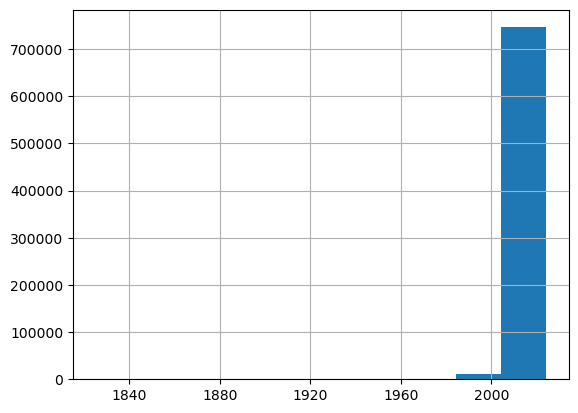

In [147]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_time'].hist()
plt.show()

## ਸੰਗਠਿਤ ਡਾਟਾ ਨਿਕਾਸ

ਆਓ ਵੇਖੀਏ ਕਿ ਅਸੀਂ ਸਾਰਾਂਸ਼ਾਂ ਤੋਂ ਕਿਹੜੀ ਜਾਣਕਾਰੀ ਆਸਾਨੀ ਨਾਲ ਪ੍ਰਾਪਤ ਕਰ ਸਕਦੇ ਹਾਂ। ਇੱਕ ਗੱਲ ਜਿਸ ਵਿੱਚ ਸਾਨੂੰ ਦਿਲਚਸਪੀ ਹੋ ਸਕਦੀ ਹੈ, ਉਹ ਇਹ ਦੇਖਣਾ ਹੈ ਕਿ ਕਿਹੜੀਆਂ ਇਲਾਜ ਰਣਨੀਤੀਆਂ ਮੌਜੂਦ ਹਨ ਅਤੇ ਉਹ ਸਮੇਂ ਦੇ ਨਾਲ ਕਿਵੇਂ ਵਿਕਸਿਤ ਹੋਈਆਂ। ਸ਼ੁਰੂਆਤ ਵਿੱਚ, ਅਸੀਂ ਹੱਥੋਂ ਤਿਆਰ ਕੀਤੀ ਸੂਚੀ ਬਣਾਉਂਦੇ ਹਾਂ ਜਿਸ ਵਿੱਚ COVID ਦੇ ਇਲਾਜ ਲਈ ਵਰਤੀਆਂ ਜਾਣ ਵਾਲੀਆਂ ਸੰਭਾਵਿਤ ਦਵਾਈਆਂ ਅਤੇ ਨਿਦਾਨਾਂ ਦੀ ਸੂਚੀ ਸ਼ਾਮਲ ਹੁੰਦੀ ਹੈ। ਫਿਰ ਅਸੀਂ ਉਨ੍ਹਾਂ ਨੂੰ ਵੇਖਦੇ ਹਾਂ ਅਤੇ ਪੇਪਰਾਂ ਦੇ ਸਾਰਾਂਸ਼ਾਂ ਵਿੱਚ ਸੰਬੰਧਤ ਸ਼ਬਦ ਲੱਭਦੇ ਹਾਂ।


In [148]:
medications = [
    'hydroxychloroquine', 'chloroquine', 'tocilizumab', 'remdesivir', 'azithromycin', 
    'lopinavir', 'ritonavir', 'dexamethasone', 'heparin', 'favipiravir', 'methylprednisolone']
diagnosis = [
    'covid','sars','pneumonia','infection','diabetes','coronavirus','death'
]

for m in medications:
    print(f" + Processing medication: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))
    
for m in diagnosis:
    print(f" + Processing diagnosis: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))

 + Processing medication: hydroxychloroquine
 + Processing medication: chloroquine
 + Processing medication: tocilizumab
 + Processing medication: remdesivir
 + Processing medication: azithromycin
 + Processing medication: lopinavir
 + Processing medication: ritonavir
 + Processing medication: dexamethasone
 + Processing medication: heparin
 + Processing medication: favipiravir
 + Processing medication: methylprednisolone
 + Processing diagnosis: covid
 + Processing diagnosis: sars
 + Processing diagnosis: pneumonia
 + Processing diagnosis: infection
 + Processing diagnosis: diabetes
 + Processing diagnosis: coronavirus
 + Processing diagnosis: death


ਅਸੀਂ ਆਪਣੇ ਡਾਟਾਫ੍ਰੇਮ ਵਿੱਚ ਕਈ ਕਾਲਮ ਜੋੜੇ ਹਨ ਜੋ ਦੱਸਦੇ ਹਨ ਕਿ ਕਿਸੇ ਦਿੱਤੀ ਗਈ ਦਵਾਈ/ਰੋਗਨਾਮਾ ਅਬਸਟਰੈਕਟ ਵਿੱਚ ਕਿੰਨੀ ਵਾਰ ਮੌਜੂਦ ਹੈ।

> **ਨੋਟ** ਕਿ ਜਦੋਂ ਅਸੀਂ ਸਬਸਟਰਿੰਗ ਦੀ ਖੋਜ ਕਰਦੇ ਹਾਂ ਤਾਂ ਅਸੀਂ ਸ਼ਬਦ ਦੇ ਸ਼ੁਰੂ ਵਿੱਚ ਖਾਲੀ ਜਗ੍ਹਾ ਜੋੜਦੇ ਹਾਂ। ਜੇ ਅਸੀਂ ਇਹ ਨਹੀਂ ਕਰਦੇ, ਤਾਂ ਸਾਨੂੰ ਗਲਤ ਨਤੀਜੇ ਮਿਲ ਸਕਦੇ ਹਨ, ਕਿਉਂਕਿ *chloroquine* ਸਬਸਟਰਿੰਗ *hydroxychloroquine* ਦੇ ਅੰਦਰ ਵੀ ਮਿਲ ਸਕਦਾ ਹੈ। ਇਸ ਤੋਂ ਇਲਾਵਾ, ਅਸੀਂ ਅਬਸਟਰੈਕਟ ਕਾਲਮ ਨੂੰ `str` ਵਿੱਚ ਬਦਲਣ ਲਈ ਮਜਬੂਰ ਕਰਦੇ ਹਾਂ ਤਾਂ ਕਿ ਇੱਕ ਗਲਤੀ ਤੋਂ ਛੁਟਕਾਰਾ ਮਿਲੇ - `str` ਨੂੰ ਹਟਾ ਕੇ ਦੇਖੋ ਕਿ ਕੀ ਹੁੰਦਾ ਹੈ।

ਡਾਟਾ ਨਾਲ ਕੰਮ ਕਰਨਾ ਆਸਾਨ ਬਣਾਉਣ ਲਈ, ਅਸੀਂ ਸਿਰਫ ਦਵਾਈ ਦੀ ਗਿਣਤੀ ਵਾਲੇ ਸਬ-ਫਰੇਮ ਨੂੰ ਕੱਢ ਸਕਦੇ ਹਾਂ ਅਤੇ ਕੁੱਲ occurrences ਦੀ ਗਿਣਤੀ ਗਿਣ ਸਕਦੇ ਹਾਂ। ਇਸ ਨਾਲ ਸਾਨੂੰ ਸਭ ਤੋਂ ਲੋਕਪ੍ਰਿਯ ਦਵਾਈ ਦਾ ਪਤਾ ਲਗਦਾ ਹੈ:


In [149]:
dfm = df[medications]
dfm = dfm.sum().reset_index().rename(columns={ 'index' : 'Name', 0 : 'Count'})
dfm.sort_values('Count',ascending=False)

Name  Count
0   hydroxychloroquine   9806
3           remdesivir   7861
2          tocilizumab   6118
1          chloroquine   4578
8              heparin   4161
5            lopinavir   3811
4         azithromycin   3585
7        dexamethasone   3340
9          favipiravir   2439
10  methylprednisolone   1600
6            ritonavir    948

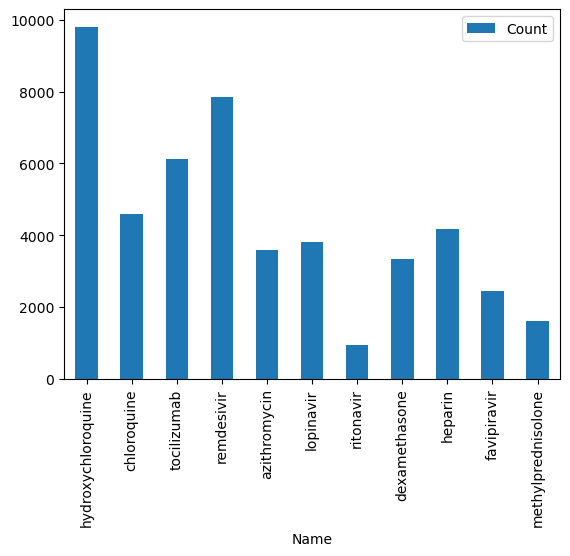

In [150]:
dfm.set_index('Name').plot(kind='bar')
plt.show()

## ਇਲਾਜ ਦੀ ਰਣਨੀਤੀ ਵਿੱਚ ਰੁਝਾਨ ਲੱਭਣ

ਉਪਰੋਕਤ ਉਦਾਹਰਣ ਵਿੱਚ ਅਸੀਂ ਸਾਰੇ ਮੁੱਲਾਂ ਦਾ `sum` ਕੀਤਾ ਹੈ, ਪਰ ਅਸੀਂ ਇਹੀ ਕੰਮ ਮਹੀਨਾਵਾਰ ਆਧਾਰ 'ਤੇ ਵੀ ਕਰ ਸਕਦੇ ਹਾਂ:


In [151]:
dfm = df[['publish_time']+medications].set_index('publish_time')
dfm = dfm[(dfm.index>="2020-01-01") & (dfm.index<="2021-07-31")]
dfmt = dfm.groupby([dfm.index.year,dfm.index.month]).sum()
dfmt

hydroxychloroquine  chloroquine  tocilizumab  \
publish_time publish_time                                                 
2020         1                           3672         1773         1779   
             2                              0           19            0   
             3                             45           72            5   
             4                            188          238           50   
             5                            459          191          158   
             6                            381          149          243   
             7                            381          178          202   
             8                            307          115          172   
             9                            319          123          185   
             10                           319           96          212   
             11                           272           66          170   
             12                           255          102          229   
2021         1                           2191          780         1787   
             2                            163           66          184   
             3                            172           85          190   
             4                            198           70          125   
             5                            141           55          138   
             6                            144           29          138   
             7                            112           49           96   

                           remdesivir  azithromycin  lopinavir  ritonavir  \
publish_time publish_time                                                   
2020         1                   2134          1173       1430        370   
             2                      3             3         18         11   
             3                     27            12         52         16   
             4                    124            68        113         13   
             5                    209           132        135         41   
             6                    186           110        132         18   
             7                    165           108        138         29   
             8                    165           145         91         24   
             9                    190            91         98         28   
             10                   227            72        127         39   
             11                   197            79        104         27   
             12                   271            98         76         31   
2021         1                   2523           892        841        198   
             2                    173            85         76          9   
             3                    295            87        100         17   
             4                    161            83         60         13   
             5                    179            69         55         21   
             6                    182            75         41         12   
             7                    270            64         59          5   

                           dexamethasone  heparin  favipiravir  \
publish_time publish_time                                        
2020         1                       561      984          666   
             2                         1        3           12   
             3                         3       21           11   
             4                        14       77           48   
             5                        12       92           48   
             6                        48       84           30   
             7                        58      117           56   
             8                        56       95           45   
             9                        90      111           46   
             10                       97      117           81   
             11                       77 

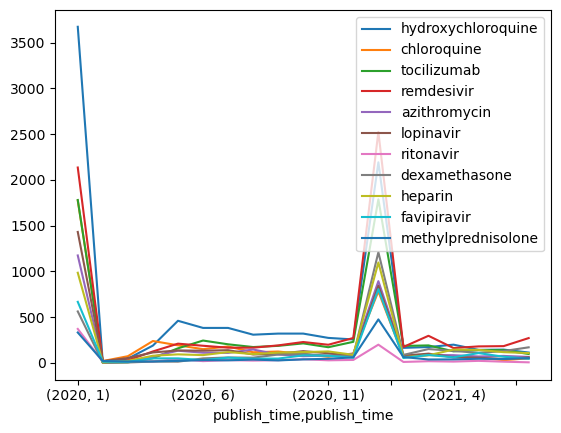

In [152]:
dfmt.plot()
plt.show()

ਇੱਕ ਦਿਲਚਸਪ ਗੱਲ ਇਹ ਹੈ ਕਿ ਸਾਨੂੰ ਦੋ ਸਥਾਨਾਂ 'ਤੇ ਵੱਡੇ ਉਛਾਲ ਦਿਖਾਈ ਦਿੰਦੇ ਹਨ: ਜਨਵਰੀ, 2020 ਅਤੇ ਜਨਵਰੀ, 2021। ਇਹ ਇਸ ਕਰਕੇ ਹੁੰਦਾ ਹੈ ਕਿਉਂਕਿ ਕੁਝ ਪੇਪਰਾਂ ਵਿੱਚ ਪ੍ਰਕਾਸ਼ਨ ਦੀ ਸਪਸ਼ਟ ਤਰੀਕੇ ਨਾਲ ਦਿੱਖਾਈ ਗਈ ਤਾਰੀਖ ਨਹੀਂ ਹੁੰਦੀ, ਅਤੇ ਉਹਨਾਂ ਨੂੰ ਸਾਲ ਦੇ ਜਨਵਰੀ ਮਹੀਨੇ ਦੇ ਰੂਪ ਵਿੱਚ ਦਰਸਾਇਆ ਜਾਂਦਾ ਹੈ।

ਡਾਟਾ ਨੂੰ ਹੋਰ ਵਧੀਆ ਸਮਝਣ ਲਈ, ਆਓ ਕੁਝ ਥੋੜੀਆਂ ਦਵਾਈਆਂ ਨੂੰ ਵਿਜੁਅਲਾਈਜ਼ ਕਰੀਏ। ਅਸੀਂ ਜਨਵਰੀ ਦੇ ਡਾਟਾ ਨੂੰ "ਹਟਾ" ਕੇ, ਉਸ ਦੀ ਥਾਂ ਕੁਝ ਦਰਮਿਆਨੀ ਮੁੱਲ ਭਰਾਂਗੇ, ਤਾਂ ਜੋ ਗ੍ਰਾਫ ਹੋਰ ਸੁੰਦਰ ਲੱਗੇ:


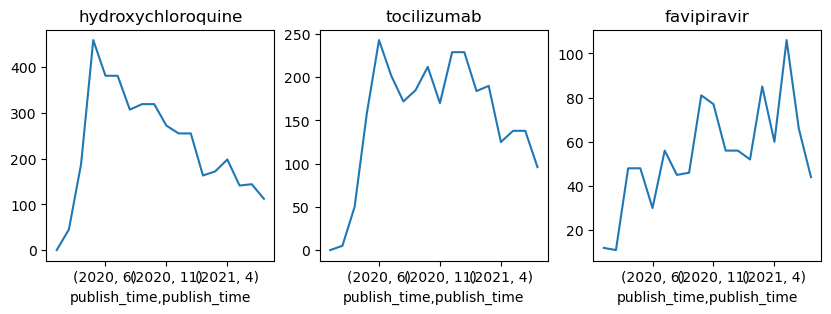

In [153]:
meds = ['hydroxychloroquine','tocilizumab','favipiravir']
dfmt.loc[(2020,1)] = np.nan
dfmt.loc[(2021,1)] = np.nan
dfmt.fillna(method='pad',inplace=True)
fig, ax = plt.subplots(1,len(meds),figsize=(10,3))
for i,m in enumerate(meds):
    dfmt[m].plot(ax=ax[i])
    ax[i].set_title(m)
plt.show()

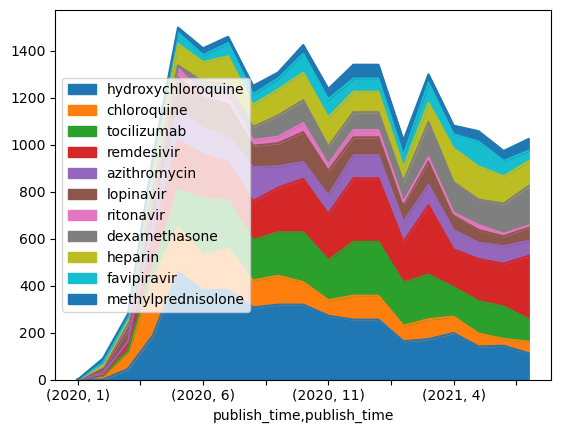

In [154]:
dfmt.plot.area()
plt.show()

ਹੋਰ ਅੱਗੇ, ਅਸੀਂ ਪ੍ਰਤੀਸ਼ਤਾਂ ਵਿੱਚ ਸਪੱਸ਼ਟ ਲੋਕਪ੍ਰਿਯਤਾ ਦੀ ਗਿਣਤੀ ਕਰ ਸਕਦੇ ਹਾਂ:


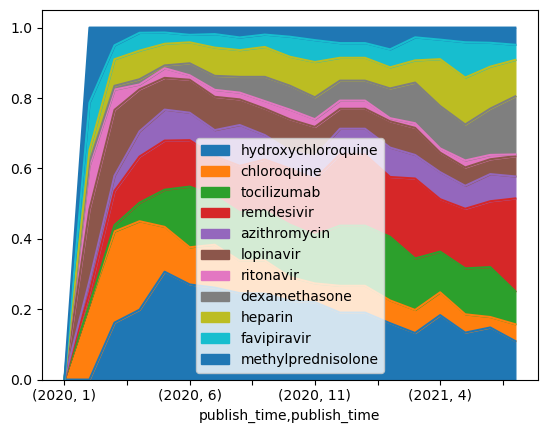

In [155]:
dfmtp = dfmt.iloc[:,:].apply(lambda x: x/x.sum(), axis=1)
dfmtp.plot.area()
plt.show()

## ਦਵਾਈ-ਨਿਰਣਯ ਸਬੰਧ ਦੀ ਗਣਨਾ

ਸਭ ਤੋਂ ਦਿਲਚਸਪ ਸਬੰਧਾਂ ਵਿੱਚੋਂ ਇੱਕ ਇਹ ਹੈ ਕਿ ਵੱਖ-ਵੱਖ ਰੋਗਾਂ ਦਾ ਇਲਾਜ ਕਿਹੜੀਆਂ ਦਵਾਈਆਂ ਨਾਲ ਕੀਤਾ ਜਾਂਦਾ ਹੈ। ਇਸਨੂੰ ਦ੍ਰਿਸ਼ਮਾਨ ਬਣਾਉਣ ਲਈ, ਸਾਨੂੰ **ਸਹਿ-ਉਪਸਥਿਤੀ ਫ੍ਰਿਕਵੈਂਸੀ ਮੈਪ** ਦੀ ਗਣਨਾ ਕਰਨ ਦੀ ਲੋੜ ਹੈ, ਜੋ ਇਹ ਦਿਖਾਵੇਗਾ ਕਿ ਦੋ ਸ਼ਬਦ ਕਿੰਨੀ ਵਾਰ ਇੱਕੋ ਕਾਗਜ਼ ਵਿੱਚ ਉਲਲੇਖਿਤ ਕੀਤੇ ਗਏ ਹਨ।

ਇਹ ਮੈਪ ਅਸਲ ਵਿੱਚ ਇੱਕ 2D ਮੈਟ੍ਰਿਕਸ ਹੈ, ਜਿਸਨੂੰ **numpy array** ਨਾਲ ਸਭ ਤੋਂ ਵਧੀਆ ਤਰੀਕੇ ਨਾਲ ਦਰਸਾਇਆ ਜਾ ਸਕਦਾ ਹੈ। ਅਸੀਂ ਇਸ ਮੈਪ ਦੀ ਗਣਨਾ ਸਾਰੇ ਅਭਿਸ਼ੰਸਾਂ ਵਿੱਚੋਂ ਗੁਜ਼ਰ ਕੇ ਕਰਾਂਗੇ ਅਤੇ ਉਥੇ ਆਉਣ ਵਾਲੀਆਂ ਇਕਾਈਆਂ ਨੂੰ ਨਿਸ਼ਾਨਿਤ ਕਰਾਂਗੇ:


In [156]:
m = np.zeros((len(medications),len(diagnosis)))
for a in df['abstract']:
    x = str(a).lower()
    for i,d in enumerate(diagnosis):
        if ' '+d in x:
            for j,me in enumerate(medications):
                if ' '+me in x:
                    m[j,i] += 1

In [157]:
m

array([[4788., 2264.,  741., 2109.,  348., 2730.,  975.],
       [2111., 1238.,  231.,  998.,   79., 1394.,  364.],
       [2186.,  821.,  691., 1063.,  185., 1136.,  573.],
       [3210., 2191.,  522., 1538.,  160., 2191.,  622.],
       [1803.,  773.,  406.,  880.,  133.,  909.,  410.],
       [1982., 1102.,  379.,  885.,  113., 1366.,  370.],
       [ 504.,  356.,   83.,  259.,   23.,  354.,  106.],
       [1419.,  640.,  345.,  742.,  108.,  760.,  314.],
       [1537.,  678.,  330.,  782.,   93.,  826.,  301.],
       [ 967.,  634.,  201.,  431.,   44.,  656.,  136.],
       [ 660.,  336.,  293.,  385.,   53.,  452.,  148.]])

ਇਸ ਮੈਟ੍ਰਿਕਸ ਨੂੰ ਦ੍ਰਿਸ਼ਟੀਗੋਚਰ ਕਰਨ ਦੇ ਤਰੀਕਿਆਂ ਵਿੱਚੋਂ ਇੱਕ ਹੈ **ਹੀਟਮੈਪ** ਬਣਾਉਣਾ:


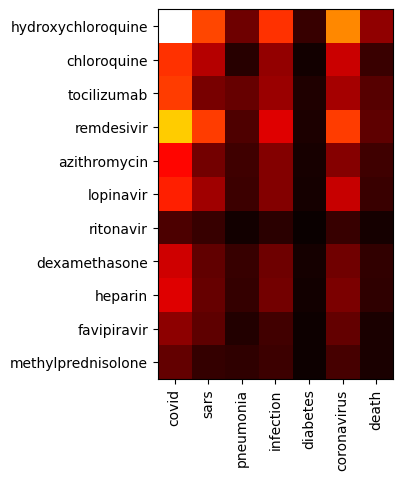

In [158]:
plt.imshow(m,interpolation='nearest',cmap='hot')
ax = plt.gca()
ax.set_yticks(range(len(medications))) 
ax.set_yticklabels(medications)
ax.set_xticks(range(len(diagnosis)))
ax.set_xticklabels(diagnosis,rotation=90)
plt.show()

ਹਾਲਾਂਕਿ **Sankey** ਡਾਇਗ੍ਰਾਮ ਦੀ ਵਰਤੋਂ ਨਾਲ ਵੀ ਬਿਹਤਰ ਵਿਜੁਅਲਾਈਜ਼ੇਸ਼ਨ ਕੀਤੀ ਜਾ ਸਕਦੀ ਹੈ! `matplotlib` ਵਿੱਚ ਇਸ ਡਾਇਗ੍ਰਾਮ ਕਿਸਮ ਲਈ ਬਿਲਟ-ਇਨ ਸਹਾਇਤਾ ਨਹੀਂ ਹੈ, ਇਸ ਲਈ ਸਾਨੂੰ [Plotly](https://plotly.com/python/) ਦੀ ਵਰਤੋਂ ਕਰਨੀ ਪਵੇਗੀ ਜਿਵੇਂ ਕਿ [ਇਸ ਟਿਊਟੋਰਿਅਲ](https://plotly.com/python/sankey-diagram/) ਵਿੱਚ ਵਰਣਨ ਕੀਤਾ ਗਿਆ ਹੈ।

Plotly Sankey ਡਾਇਗ੍ਰਾਮ ਬਣਾਉਣ ਲਈ, ਸਾਨੂੰ ਹੇਠਾਂ ਦਿੱਤੀਆਂ ਸੂਚੀਆਂ ਬਣਾਉਣ ਦੀ ਲੋੜ ਹੈ:
* ਗ੍ਰਾਫ ਵਿੱਚ ਸਾਰੇ nodes ਦੀ ਸੂਚੀ `all_nodes`, ਜਿਸ ਵਿੱਚ ਦਵਾਈਆਂ ਅਤੇ ਡਾਇਗਨੋਸਿਸ ਦੋਵੇਂ ਸ਼ਾਮਲ ਹੋਣਗੇ
* ਸਰੋਤ ਅਤੇ ਟਾਰਗੇਟ ਇੰਡੈਕਸ ਦੀ ਸੂਚੀ - ਇਹ ਸੂਚੀਆਂ ਦਰਸਾਉਣਗੀਆਂ ਕਿ ਕਿਹੜੇ nodes ਖੱਬੇ ਜਾਂਦੇ ਹਨ ਅਤੇ ਕਿਹੜੇ ਸੱਜੇ ਹਿੱਸੇ ਵਿੱਚ
* ਸਾਰੇ ਲਿੰਕਾਂ ਦੀ ਸੂਚੀ, ਹਰ ਲਿੰਕ ਵਿੱਚ ਸ਼ਾਮਲ ਹੋਵੇਗਾ:
   - `all_nodes` ਐਰੇ ਵਿੱਚ ਸਰੋਤ ਇੰਡੈਕਸ
   - ਟਾਰਗੇਟ ਇੰਡੈਕਸ
   - ਲਿੰਕ ਦੀ ਤਾਕਤ ਦਰਸਾਉਣ ਵਾਲੀ ਵੈਲਿਊ। ਇਹ ਸਾਡੇ co-occurence ਮੈਟ੍ਰਿਕਸ ਤੋਂ ਸਿੱਧੀ ਵੈਲਿਊ ਹੈ।
   - ਵਿਕਲਪਕ ਤੌਰ 'ਤੇ ਲਿੰਕ ਦਾ ਰੰਗ। ਸਪਸ਼ਟਤਾ ਲਈ ਕੁਝ ਸ਼ਬਦਾਂ ਨੂੰ ਹਾਈਲਾਈਟ ਕਰਨ ਦਾ ਵਿਕਲਪ ਬਣਾਇਆ ਜਾਵੇਗਾ

Sankey ਡਾਇਗ੍ਰਾਮ ਬਣਾਉਣ ਲਈ ਜਨਰਲ ਕੋਡ ਨੂੰ ਇੱਕ ਵੱਖਰੇ `sankey` ਫੰਕਸ਼ਨ ਦੇ ਰੂਪ ਵਿੱਚ ਬਣਾਇਆ ਗਿਆ ਹੈ, ਜੋ ਦੋ ਸੂਚੀਆਂ (ਸਰੋਤ ਅਤੇ ਟਾਰਗੇਟ ਸ਼੍ਰੇਣੀਆਂ) ਅਤੇ co-occurence ਮੈਟ੍ਰਿਕਸ ਨੂੰ ਲੈਂਦਾ ਹੈ। ਇਹ ਸਾਨੂੰ threshold ਨਿਰਧਾਰਤ ਕਰਨ ਦੀ ਵੀ ਆਗਿਆ ਦਿੰਦਾ ਹੈ, ਅਤੇ ਉਹ ਸਾਰੇ ਲਿੰਕ ਹਟਾ ਦਿੰਦਾ ਹੈ ਜੋ ਉਸ threshold ਤੋਂ ਕਮਜ਼ੋਰ ਹਨ - ਇਸ ਨਾਲ ਡਾਇਗ੍ਰਾਮ ਥੋੜਾ ਘੱਟ ਜਟਿਲ ਬਣ ਜਾਂਦਾ ਹੈ।


In [160]:
import plotly.graph_objects as go

def sankey(cat1, cat2, m, treshold=0, h1=[], h2=[]):
    all_nodes = cat1 + cat2
    source_indices = list(range(len(cat1)))
    target_indices = list(range(len(cat1),len(cat1)+len(cat2)))

    s, t, v, c = [], [], [], []
    for i in range(len(cat1)):
        for j in range(len(cat2)):
            if m[i,j]>treshold:
                s.append(i)
                t.append(len(cat1)+j)
                v.append(m[i,j])
                c.append('pink' if i in h1 or j in h2 else 'lightgray')

    fig = go.Figure(data=[go.Sankey(
        # Define nodes
        node = dict(
        pad = 40,
        thickness = 40,
        line = dict(color = "black", width = 1.0),
        label =  all_nodes),

        # Add links
        link = dict(
        source =  s,
        target =  t,
        value =  v,
        color = c
    ))])
    fig.show()

sankey(medications,diagnosis,m,500,h2=[0])

## ਨਤੀਜਾ

ਤੁਸੀਂ ਵੇਖਿਆ ਹੈ ਕਿ ਅਸੀਂ ਸਧਾਰਨ ਤਰੀਕਿਆਂ ਦੀ ਵਰਤੋਂ ਕਰਕੇ ਗੈਰ-ਸੰਰਚਿਤ ਡਾਟਾ ਸਰੋਤਾਂ, ਜਿਵੇਂ ਕਿ ਟੈਕਸਟ, ਤੋਂ ਜਾਣਕਾਰੀ ਪ੍ਰਾਪਤ ਕਰ ਸਕਦੇ ਹਾਂ। ਇਸ ਉਦਾਹਰਨ ਵਿੱਚ, ਅਸੀਂ ਦਵਾਈਆਂ ਦੀ ਮੌਜੂਦਾ ਸੂਚੀ ਲਈ ਹੈ, ਪਰ ਇਹ ਕਾਫੀ ਸ਼ਕਤੀਸ਼ਾਲੀ ਹੋਵੇਗਾ ਜੇ ਅਸੀਂ ਕੁਦਰਤੀ ਭਾਸ਼ਾ ਪ੍ਰਕਿਰਿਆ (NLP) ਤਕਨੀਕਾਂ ਦੀ ਵਰਤੋਂ ਕਰਕੇ ਟੈਕਸਟ ਤੋਂ ਇਕਾਈਆਂ ਦੀ ਖੋਜ ਕਰ ਸਕੀਏ। [ਇਸ ਬਲੌਗ ਪੋਸਟ](https://soshnikov.com/science/analyzing-medical-papers-with-azure-and-text-analytics-for-health/) ਵਿੱਚ ਅਸੀਂ ਵਰਣਨ ਕੀਤਾ ਹੈ ਕਿ ਕਲਾਉਡ ਸੇਵਾਵਾਂ ਦੀ ਵਰਤੋਂ ਕਰਕੇ ਇਕਾਈਆਂ ਦੀ ਖੋਜ ਕਿਵੇਂ ਕੀਤੀ ਜਾ ਸਕਦੀ ਹੈ। ਇੱਕ ਹੋਰ ਵਿਕਲਪ Python NLP ਲਾਇਬ੍ਰੇਰੀਆਂ ਜਿਵੇਂ ਕਿ [NLTK](https://www.nltk.org/) ਦੀ ਵਰਤੋਂ ਕਰਨਾ ਹੋਵੇਗਾ - NLTK ਦੀ ਵਰਤੋਂ ਕਰਕੇ ਟੈਕਸਟ ਤੋਂ ਜਾਣਕਾਰੀ ਪ੍ਰਾਪਤ ਕਰਨ ਦਾ ਤਰੀਕਾ [ਇੱਥੇ](https://www.nltk.org/book/ch07.html) ਵਰਣਨ ਕੀਤਾ ਗਿਆ ਹੈ।


## ਚੁਣੌਤੀ

ਕੋਵਿਡ ਪੇਪਰ ਡਾਟਾ 'ਤੇ ਹੇਠਾਂ ਦਿੱਤੇ ਪਾਸਿਆਂ 'ਤੇ ਖੋਜ ਜਾਰੀ ਰੱਖੋ:

1. ਵੱਖ-ਵੱਖ ਦਵਾਈਆਂ ਦੀ ਸਹ-ਉਪਸਥਿਤੀ ਮੈਟ੍ਰਿਕਸ ਬਣਾਓ, ਅਤੇ ਵੇਖੋ ਕਿ ਕਿਹੜੀਆਂ ਦਵਾਈਆਂ ਅਕਸਰ ਇਕੱਠੇ ਆਉਂਦੀਆਂ ਹਨ (ਜਿਵੇਂ ਕਿ ਇੱਕ ਅਬਸਟਰੈਕਟ ਵਿੱਚ ਜ਼ਿਕਰ ਕੀਤਾ ਗਿਆ ਹੈ)। ਦਵਾਈਆਂ ਅਤੇ ਰੋਗਾਂ ਲਈ ਸਹ-ਉਪਸਥਿਤੀ ਮੈਟ੍ਰਿਕਸ ਬਣਾਉਣ ਲਈ ਕੋਡ ਨੂੰ ਸੋਧਿਆ ਜਾ ਸਕਦਾ ਹੈ।
1. ਇਸ ਮੈਟ੍ਰਿਕਸ ਨੂੰ ਹੀਟਮੈਪ ਦੀ ਵਰਤੋਂ ਕਰਕੇ ਵਿਖਾਓ।
1. ਇੱਕ ਵਧੇਰੇ ਚੁਣੌਤੀ ਭਰੇ ਟਾਸਕ ਵਜੋਂ, ਤੁਸੀਂ ਦਵਾਈਆਂ ਦੀ ਸਹ-ਉਪਸਥਿਤੀ ਨੂੰ [ਚੋਰਡ ਡਾਇਗ੍ਰਾਮ](https://en.wikipedia.org/wiki/Chord_diagram) ਦੀ ਵਰਤੋਂ ਕਰਕੇ ਵਿਖਾਉਣ ਦੀ ਕੋਸ਼ਿਸ਼ ਕਰ ਸਕਦੇ ਹੋ। [ਇਹ ਲਾਇਬ੍ਰੇਰੀ](https://pypi.org/project/chord/) ਤੁਹਾਨੂੰ ਚੋਰਡ ਡਾਇਗ੍ਰਾਮ ਬਣਾਉਣ ਵਿੱਚ ਮਦਦ ਕਰ ਸਕਦੀ ਹੈ।
1. ਇੱਕ ਹੋਰ ਵਧੇਰੇ ਚੁਣੌਤੀ ਭਰੇ ਟਾਸਕ ਵਜੋਂ, ਵੱਖ-ਵੱਖ ਦਵਾਈਆਂ ਦੀ ਖੁਰਾਕ (ਜਿਵੇਂ ਕਿ **400mg** ਵਿੱਚ *ਰੋਜ਼ਾਨਾ 400mg ਕਲੋਰੋਕੁਇਨ ਲਓ*) ਨੂੰ ਰੈਗੂਲਰ ਐਕਸਪ੍ਰੈਸ਼ਨ ਦੀ ਵਰਤੋਂ ਕਰਕੇ ਕੱਢਣ ਦੀ ਕੋਸ਼ਿਸ਼ ਕਰੋ, ਅਤੇ ਇੱਕ ਡਾਟਾਫ੍ਰੇਮ ਬਣਾਓ ਜੋ ਵੱਖ-ਵੱਖ ਦਵਾਈਆਂ ਲਈ ਵੱਖ-ਵੱਖ ਖੁਰਾਕਾਂ ਨੂੰ ਦਿਖਾਉਂਦਾ ਹੈ। **ਨੋਟ**: ਉਹ ਗਿਣਤੀਮੂਲਕ ਮੁੱਲ ਧਿਆਨ ਵਿੱਚ ਰੱਖੋ ਜੋ ਦਵਾਈ ਦੇ ਨਾਮ ਦੇ ਨਜ਼ਦੀਕੀ ਟੈਕਸਟ ਵਿੱਚ ਹਨ।



---

**ਅਸਵੀਕਰਤੀ**:  
ਇਹ ਦਸਤਾਵੇਜ਼ AI ਅਨੁਵਾਦ ਸੇਵਾ [Co-op Translator](https://github.com/Azure/co-op-translator) ਦੀ ਵਰਤੋਂ ਕਰਕੇ ਅਨੁਵਾਦ ਕੀਤਾ ਗਿਆ ਹੈ। ਜਦੋਂ ਕਿ ਅਸੀਂ ਸਹੀ ਹੋਣ ਦਾ ਯਤਨ ਕਰਦੇ ਹਾਂ, ਕਿਰਪਾ ਕਰਕੇ ਧਿਆਨ ਦਿਓ ਕਿ ਸਵੈਚਾਲਿਤ ਅਨੁਵਾਦਾਂ ਵਿੱਚ ਗਲਤੀਆਂ ਜਾਂ ਅਸੁੱਚਤਤਾਵਾਂ ਹੋ ਸਕਦੀਆਂ ਹਨ। ਇਸ ਦੀ ਮੂਲ ਭਾਸ਼ਾ ਵਿੱਚ ਮੌਜੂਦ ਮੂਲ ਦਸਤਾਵੇਜ਼ ਨੂੰ ਪ੍ਰਮਾਣਿਕ ਸਰੋਤ ਮੰਨਿਆ ਜਾਣਾ ਚਾਹੀਦਾ ਹੈ। ਮਹੱਤਵਪੂਰਨ ਜਾਣਕਾਰੀ ਲਈ, ਪੇਸ਼ੇਵਰ ਮਨੁੱਖੀ ਅਨੁਵਾਦ ਦੀ ਸਿਫਾਰਸ਼ ਕੀਤੀ ਜਾਂਦੀ ਹੈ। ਇਸ ਅਨੁਵਾਦ ਦੀ ਵਰਤੋਂ ਤੋਂ ਪੈਦਾ ਹੋਣ ਵਾਲੇ ਕਿਸੇ ਵੀ ਗਲਤਫਹਿਮੀ ਜਾਂ ਗਲਤ ਵਿਆਖਿਆ ਲਈ ਅਸੀਂ ਜ਼ਿੰਮੇਵਾਰ ਨਹੀਂ ਹਾਂ।
